In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [69]:
teacher_teacher_overlaps = np.linspace(0, np.pi, 50)
dates_ = ["2020-08-10-13-55-27", "2020-08-10-13-55-29", "2020-08-10-13-55-30"]
dates = ["2020-08-10-14-36-01", "2020-08-10-14-36-03"]
dfs = get_dfs(dates)

In [49]:
def get_dfs(dates):
    dfs = {}
    for date in dates:
        indices = os.listdir(f"../experiments/results/{date}")
        for index in indices:
            dfs[index] = pd.read_csv(f"../experiments/results/{date}/{index}/ode_logs.csv")
    return dfs

In [70]:
len(teacher_teacher_overlaps)

50

In [172]:
dfs['0'].columns

Index(['Q_00', 'Q_01', 'Q_10', 'Q_11', 'Q_00_diff', 'Q_01_diff', 'Q_10_diff',
       'Q_11_diff', 'R_00', 'R_10', 'R_00_diff', 'R_10_diff', 'U_00', 'U_10',
       'U_00_diff', 'U_10_diff', 'h1_0', 'h1_1', 'h1_0_diff', 'h1_1_diff',
       'h2_0', 'h2_1', 'h2_0_diff', 'h2_1_diff', 'error_linear_1',
       'error_linear_1_diff', 'error_linear_2', 'error_linear_2_diff',
       'error_log_1', 'error_log_2', 'task_switch_error_1_log',
       'task_switch_error_2_log'],
      dtype='object')

/Users/sebastianlee/Envs/cata/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
/Users/sebastianlee/Envs/cata/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  if __name__ == '__main__':
/Users/sebastianlee/Envs/cata/lib/python3.6/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/sebastianlee/Envs/cata/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


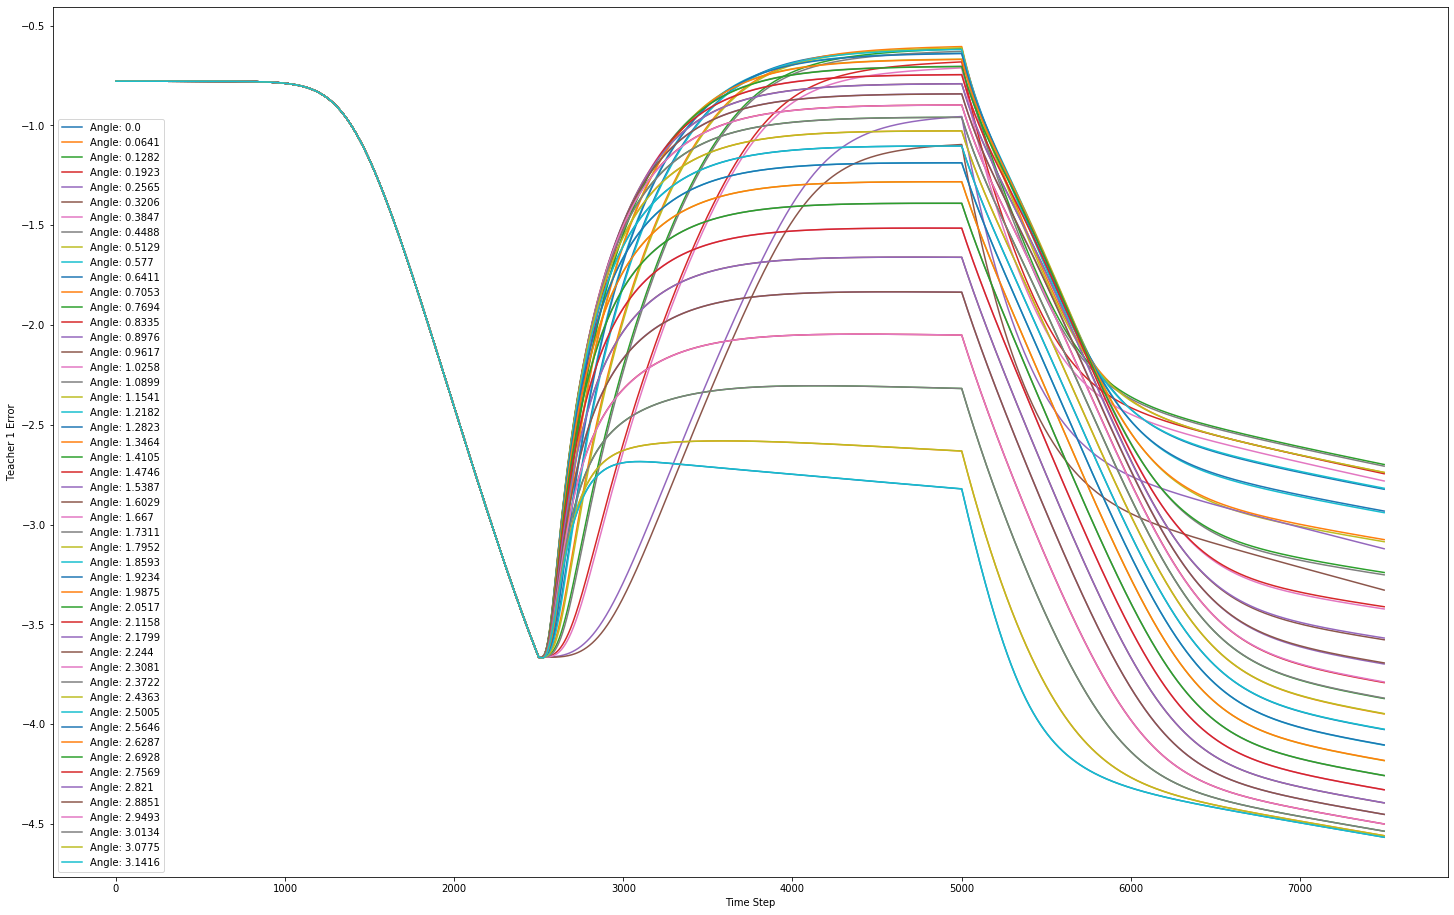

In [161]:
fig = plt.figure(figsize=(25,16))
indices = sorted(dfs.keys(), key=lambda x: int(x))
for index in indices:
    dfs[index]["error_log_1"].plot(label=f"Angle: {round(teacher_teacher_overlaps[int(index)], 4)}")
plt.xlabel("Time Step")
plt.ylabel("Teacher 1 Error")
plt.legend()
fig.show()
fig.savefig("Teacher 1 Error.pdf", dpi=100)

/Users/sebastianlee/Envs/cata/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
/Users/sebastianlee/Envs/cata/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  import sys
/Users/sebastianlee/Envs/cata/lib/python3.6/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/sebastianlee/Envs/cata/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


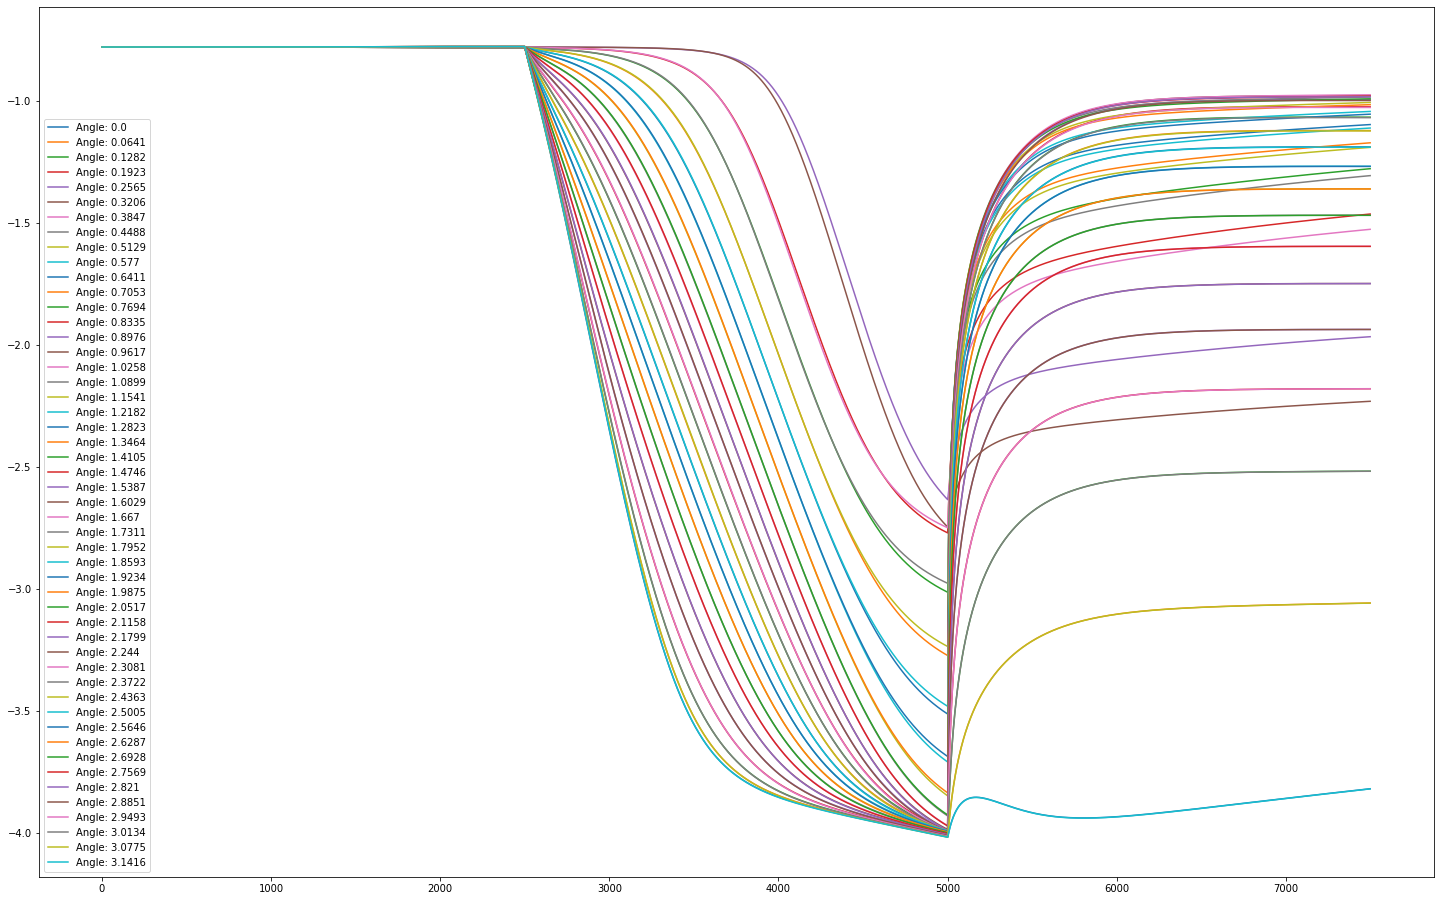

In [162]:
fig = plt.figure(figsize=(25,16))
indices = sorted(dfs.keys(), key=lambda x: int(x))
for index in indices:
    dfs[index]["error_log_2"].plot(label=f"Angle: {round(teacher_teacher_overlaps[int(index)], 4)}")
plt.legend()
fig.show()
fig.savefig("Teacher 2 Error.pdf", dpi=100)

In [83]:
task_switch_errors_1 = [np.array(dfs[str(i)].task_switch_error_1_log.dropna())[1] for i in range(len(teacher_teacher_overlaps))]
task_switch_errors_2 = [np.array(dfs[str(i)].task_switch_error_2_log.dropna())[1] for i in range(len(teacher_teacher_overlaps))]

/Users/sebastianlee/Envs/cata/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


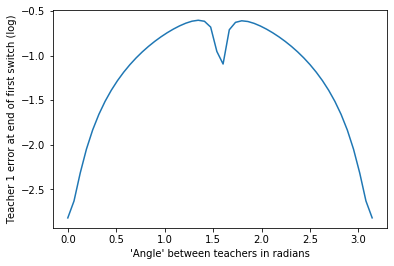

In [164]:
fig = plt.figure()
plt.plot(teacher_teacher_overlaps, np.log10(task_switch_errors_1))
plt.xlabel("'Angle' between teachers in radians")
plt.ylabel("Teacher 1 error at end of first switch (log)")
fig.show()
fig.savefig("Error end of first switch.pdf")

/Users/sebastianlee/Envs/cata/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


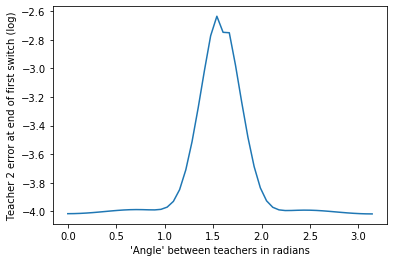

In [165]:
fig = plt.figure()
plt.plot(teacher_teacher_overlaps, np.log10(task_switch_errors_2))
plt.xlabel("'Angle' between teachers in radians")
plt.ylabel("Teacher 2 error at end of first switch (log)")
fig.show()
fig.savefig("Error end of second switch.pdf")

In [156]:
forgetting_rate_1 = [np.array(dfs[str(i)].iloc[2501].error_linear_1_diff) for i in range(len(teacher_teacher_overlaps))]
forgetting_rate_2 = [np.array(dfs[str(i)].iloc[5001].error_linear_2_diff) for i in range(len(teacher_teacher_overlaps))]

/Users/sebastianlee/Envs/cata/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


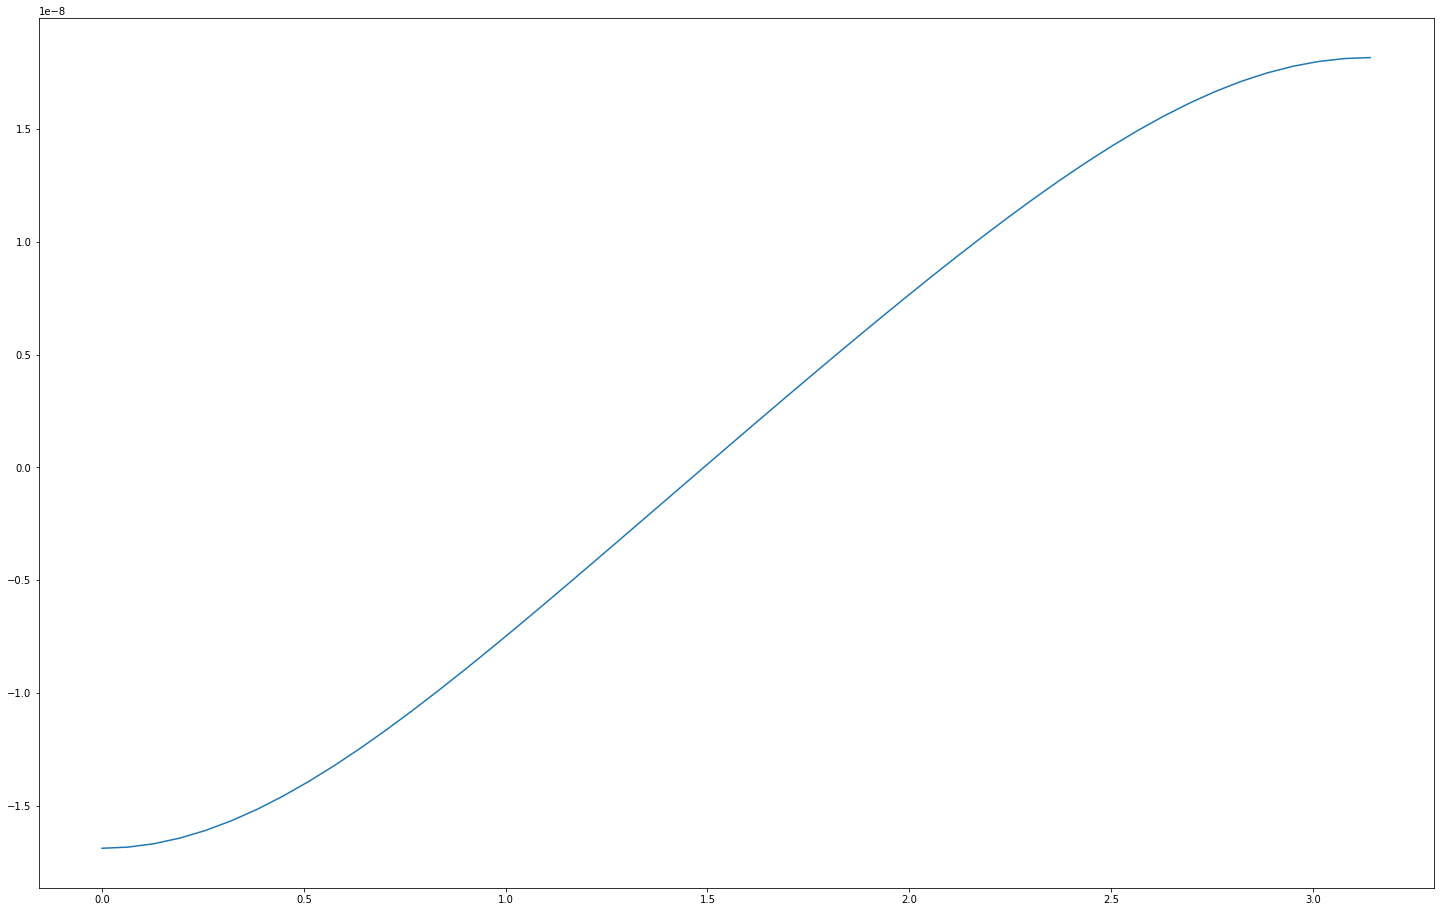

In [157]:
fig = plt.figure(figsize=(25,16))
plt.plot(teacher_teacher_overlaps, forgetting_rate_1)
fig.show()

/Users/sebastianlee/Envs/cata/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


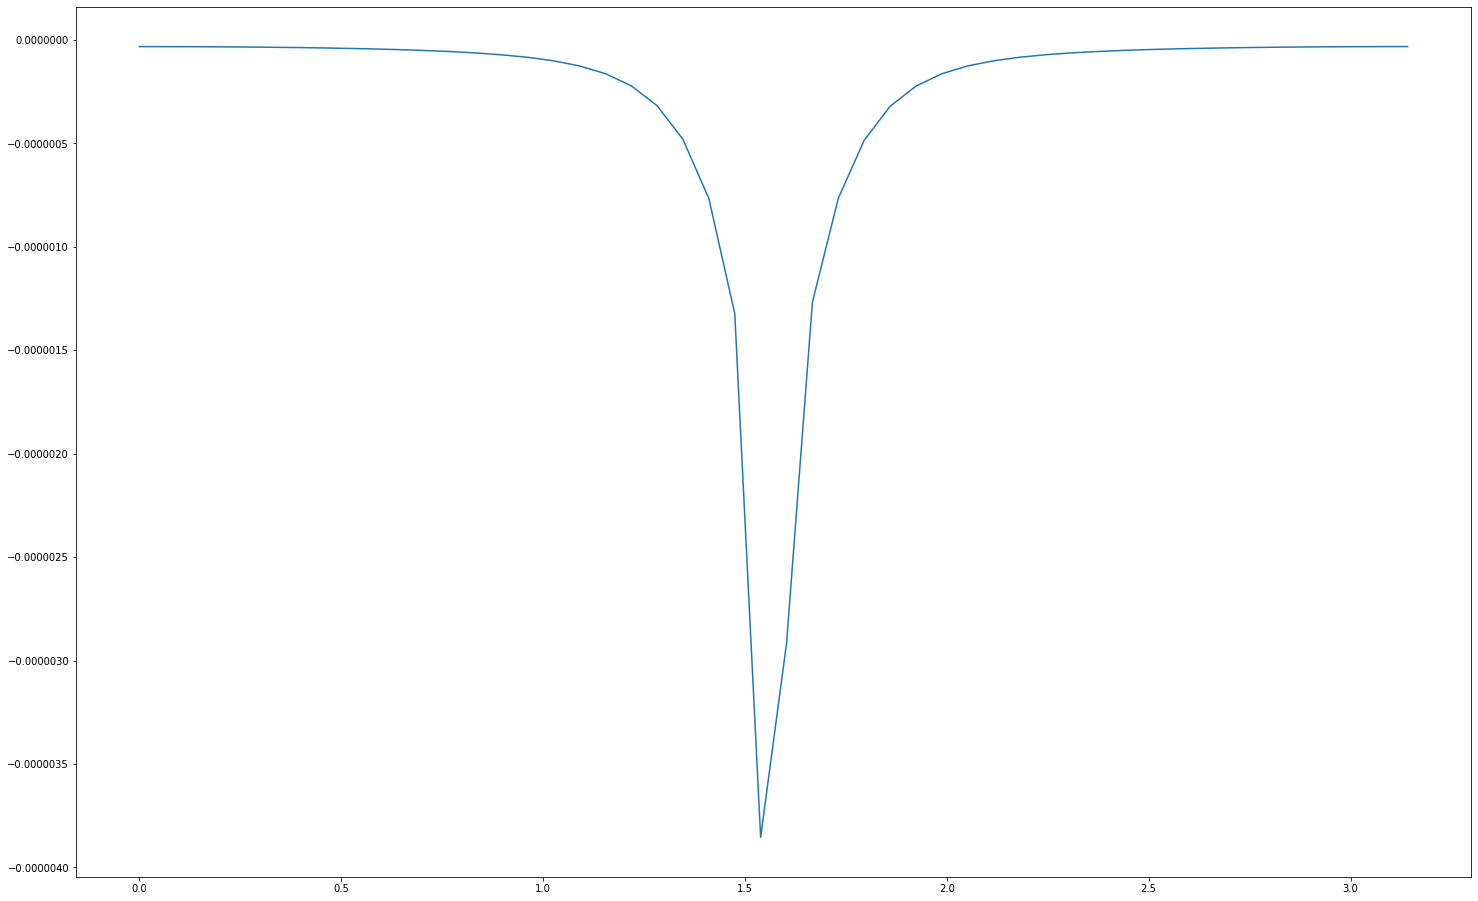

In [158]:
fig = plt.figure(figsize=(25,16))
plt.plot(teacher_teacher_overlaps, forgetting_rate_2)
fig.show()

In [182]:
u_log_00 = [np.array(dfs[str(i)].U_00.dropna())[-1] for i in range(len(teacher_teacher_overlaps))]
u_log_10 = [np.array(dfs[str(i)].U_10.dropna()) for i in range(len(teacher_teacher_overlaps))]

/Users/sebastianlee/Envs/cata/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


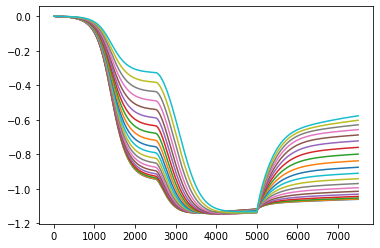

In [181]:
fig = plt.figure()
for u_log in u_log_00[:20]:
    plt.plot(range(len(u_log)), u_log)
    
fig.show()

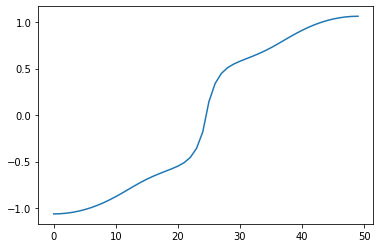

In [186]:
plt.plot(range(len(u_log_00)), u_log_00)